# Analyzing New York City employees' payroll database 

## Data Source: [NYC open data](https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e/data)

In [1]:
import pandas as pd
df = pd.read_csv('Citywide_Payroll_Data__Fiscal_Year_.csv')
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")
df.columns = df.columns.str.lower()
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df.shape

(2864545, 17)

Previous versions of the dataset didn't import all the years correctly, so I'll do these sanity checks a couple of times

In [3]:
df.fiscal_year.value_counts()

2019    592431
2020    590210
2021    573477
2017    562266
2018    546161
Name: fiscal_year, dtype: int64

#### Cleaning the data

The database includes people whose work locations are outside of NYC. For this analyses, I'm only including employees with work locations in NYC boroughs. Since Staten Island wasn't listed (unless included in the "other" location, this is filtered down to Queens, Manhattan, Bronx and Brooklyn.

In [4]:
boroughs = ['QUEENS', 'MANHATTAN', 'BROOKLYN', 'BRONX']

In [5]:
df = df[df.work_location_borough.isin(boroughs)]

In [6]:
df.shape

(2760682, 17)

Note: This reduced the dataset by 103,863 rows.

In [7]:
df['total_pay'] = df.regular_gross_paid + df.total_ot_paid + df.total_other_pay

In [8]:
df.sort_values(by='total_pay', ascending = False).head(10)

fiscal_year  payroll_number                     agency_name  \
1705625         2020           56.00               POLICE DEPARTMENT   
979064          2018          826.00  DEPT OF ENVIRONMENT PROTECTION   
2291068         2021          996.00           NYC HOUSING AUTHORITY   
979061          2018          826.00  DEPT OF ENVIRONMENT PROTECTION   
1117631         2019           57.00                 FIRE DEPARTMENT   
979062          2018          826.00  DEPT OF ENVIRONMENT PROTECTION   
979073          2018          826.00  DEPT OF ENVIRONMENT PROTECTION   
979077          2018          826.00  DEPT OF ENVIRONMENT PROTECTION   
979079          2018          826.00  DEPT OF ENVIRONMENT PROTECTION   
979065          2018          826.00  DEPT OF ENVIRONMENT PROTECTION   

            last_name   first_name mid_init agency_start_date  \
1705625       MORALES         JOSE      NaN        12/20/1998   
979064       LAUDANDO  CHRISTOPHER      NaN        04/26/1993   
2291068   MUSTACIUOLO         VITO        J        02/26/2018   
979061            BUI          HUU      NaN        04/26/1993   
1117631      PHILLIPS     LYNDELLE        T        06/05/2006   
979062   GIOVANNIELLO        FRANK        J        06/06/1994   
979073       ANDERSON     COURTNAY        D        02/24/1986   
979077            ALI      ZAINOOL      NaN        12/02/1996   
979079         KITTEL       ANDREW        M        03/05/1990   
979065        PASTORE       DANIEL      NaN        03/21/1988   

        work_location_borough              title_description  \
1705625             MANHATTAN  SUPERVISOR OF SCHOOL SECURITY   
979064               BROOKLYN     SENIOR STATIONARY ENGINEER   
2291068             MANHATTAN             EXECUTIVE DIRECTOR   
979061                  BRONX            STATIONARY ENGINEER   
1117631              BROOKLYN   ADMINISTRATIVE STAFF ANALYST   
979062                 QUEENS            STATIONARY ENGINEER   
979073                 QUEENS     SENIOR STATIONARY ENGINEER   
979077               BROOKLYN     SENIOR STATIONARY ENGINEER   
979079               BROOKLYN     SENIOR STATIONARY ENGINEER   
979065              MANHATTAN            STATIONARY ENGINEER   

        leave_status_as_of_june_30  base_salary  pay_basis  regular_hours  \
1705625                     CEASED    57,813.00  per Annum           0.00   
979064                      ACTIVE       575.52    per Day       2,045.72   
2291068                     ACTIVE   258,000.00  per Annum       1,820.00   
979061                      ACTIVE       467.20    per Day       2,085.72   
1117631                     CEASED   129,611.00  per Annum         140.00   
979062                      ACTIVE       467.20    per Day       2,085.72   
979073                      ACTIVE       575.52    per Day       2,045.72   
979077                      ACTIVE       575.52    per Day       2,045.72   
979079                      ACTIVE       575.52    per Day       2,007.72   
979065                      ACTIVE       467.20    per Day       2,085.72   

         regular_gross_paid  ot_hours  total_ot_paid  total_other_pay  \
1705625                0.00      0.00           0.00       650,000.00   
979064           362,522.47    767.50     153,226.04           563.00   
2291068          257,260.30      0.00           0.00       258,000.00   
979061           265,284.18  1,380.00     182,178.73        60,347.27   
1117631          500,000.00      0.00           0.00             0.00   
979062           264,925.47  1,016.50     178,476.58        50,899.01   
979073           357,426.59    546.50     134,050.29           563.00   
979077           348,668.06    536.75     129,141.26           563.00   
979079           352,014.45    529.25     123,602.33           563.00   
979065           263,164.37    849.75     148,809.87        53,345.91   

         total_pay  
1705625 650,000.00  
979064  516,311.51  
2291068 515,260.30  
979061  507,810.18  
1117631 500,000.00  
979062  494,301.0

In [9]:
df.total_pay.max()

650000.0

In [10]:
df.total_pay.min()

-137960.51

### Ignoring the negatives. Assuming this is people who owe money to the city. The dataset alone cannot answer this so leaving this to reporting

### Interesting to see Jose Morales made $650K in 2020 and is no longer on city payroll

In [11]:
df.query('last_name == "MORALES"').query('first_name == "JOSE"').query('agency_name == "POLICE DEPARTMENT"').query('agency_start_date == "12/20/1998"')

fiscal_year  payroll_number        agency_name last_name first_name  \
1705625         2020           56.00  POLICE DEPARTMENT   MORALES       JOSE   

        mid_init agency_start_date work_location_borough  \
1705625      NaN        12/20/1998             MANHATTAN   

                     title_description leave_status_as_of_june_30  \
1705625  SUPERVISOR OF SCHOOL SECURITY                     CEASED   

         base_salary  pay_basis  regular_hours  regular_gross_paid  ot_hours  \
1705625    57,813.00  per Annum           0.00                0.00      0.00   

         total_ot_paid  total_other_pay  total_pay  
1705625           0.00       650,000.00 650,000.00

### Let's dive into overtime now :') !

In [12]:
df.sort_values(by='total_ot_paid', ascending = False).head(10)

fiscal_year  payroll_number                    agency_name  \
2291076         2021          996.00          NYC HOUSING AUTHORITY   
2291070         2021          816.00  DEPT OF HEALTH/MENTAL HYGIENE   
2291085         2021          996.00          NYC HOUSING AUTHORITY   
2291072         2021          816.00  DEPT OF HEALTH/MENTAL HYGIENE   
2291071         2021          816.00  DEPT OF HEALTH/MENTAL HYGIENE   
2291081         2021            3.00              BOARD OF ELECTION   
2234227         2020          996.00          NYC HOUSING AUTHORITY   
2234228         2020          996.00          NYC HOUSING AUTHORITY   
1069369         2018          996.00          NYC HOUSING AUTHORITY   
2291078         2021          996.00          NYC HOUSING AUTHORITY   

         last_name first_name mid_init agency_start_date  \
2291076    PROCIDA     ROBERT      NaN        04/13/1987   
2291070  MCGROARTY    MICHAEL      NaN        10/06/2014   
2291085  MARKOWSKI      JAKUB      NaN        05/31/2016   
2291072     PETTIT    PATRICK        J        08/02/2010   
2291071   HALLAHAN    PATRICK        M        02/26/2018   
2291081  ORTIZ, JR    ANTONIO      NaN        08/27/1995   
2234227    PROCIDA     ROBERT      NaN        04/13/1987   
2234228      ORTIZ       JOSE      NaN        11/27/1989   
1069369   GIURBINO   VINCENZO      NaN        04/28/2003   
2291078      DALEY   GARFIELD        D        05/24/1994   

        work_location_borough        title_description  \
2291076                 BRONX       SUPERVISOR PLUMBER   
2291070                QUEENS      STATIONARY ENGINEER   
2291085                 BRONX                  PLUMBER   
2291072             MANHATTAN      STATIONARY ENGINEER   
2291071              BROOKLYN      STATIONARY ENGINEER   
2291081             MANHATTAN  SENIOR SYSTEMS ANALYSTS   
2234227                 BRONX       SUPERVISOR PLUMBER   
2234228                QUEENS       SUPERVISOR PLUMBER   
1069369              BROOKLYN                  PLUMBER   
2291078                 BRONX   SUPERVISOR ELECTRICIAN   

        leave_status_as_of_june_30  base_salary  pay_basis  regular_hours  \
2291076                     ACTIVE       387.03    per Day       1,820.00   
2291070                     ACTIVE       508.80    per Day       2,080.00   
2291085                     ACTIVE       369.53    per Day       1,820.00   
2291072                     ACTIVE       508.80    per Day       2,080.00   
2291071                     ACTIVE       508.80    per Day       2,080.00   
2291081                     ACTIVE   117,003.00  per Annum       1,820.00   
2234227                     ACTIVE       387.03    per Day       1,820.00   
2234228                     ACTIVE       387.03    per Day       1,820.00   
1069369                     ACTIVE       361.48    per Day       1,825.00   
2291078                     ACTIVE       460.25    per Day       1,820.00   

         regular_gross_paid  ot_hours  total_ot_paid  total_other_pay  \
2291076          100,627.80  2,249.50     248,749.72         7,215.34   
2291070          132,288.00  2,374.75     238,829.13        40,105.00   
2291085           96,077.80  2,119.50     223,776.86         5,899.29   
2291072          132,288.00  2,152.75     218,694.96        38,611.82   
2291071          132,288.00  2,115.25     218,628.18        56,616.07   
2291081          116,673.77  2,461.25     217,915.94         2,974.95   
2234227          100,627.80  1,944.50     215,022.81         6,468.93   
2234228          100,627.80  1,937.50     214,248.85         5,860.74   
1069369           93,984.80  2,043.00     213,634.68         7,539.44   
2291078          119,469.25  2,032.50     200,038.56        28,316.97   

         total_pay  
2291076 356,592.86  
2291070 411,222.13  
2291085 325,753.95  
2291072 389,594.78  
2291071 407,532.25  
2291081 337,564.66  
2234227 322,119.54  
2234228 320,737.39  
1069369 315,158.92  
2291078 347,824.78

#### Five of these ten have the word 'plumber' in their title. Let's inspect further

In [13]:
import re
df[df['title_description'].str.contains('.PLUMBER')== True].agency_name.value_counts()

NYC HOUSING AUTHORITY             83
DEPARTMENT OF EDUCATION ADMIN     34
DEPT OF ENVIRONMENT PROTECTION    27
DEPT OF PARKS & RECREATION        23
FIRE DEPARTMENT                   22
DEPT. OF HOMELESS SERVICES        14
DEPARTMENT OF SANITATION          12
POLICE DEPARTMENT                 12
HRA/DEPT OF SOCIAL SERVICES       10
DEPARTMENT OF CORRECTION           5
DEPARTMENT OF TRANSPORTATION       5
DEPT OF CITYWIDE ADMIN SVCS        5
COMMUNITY COLLEGE (HOSTOS)         1
Name: agency_name, dtype: int64

In [14]:
df[df['title_description'].str.contains('.PLUMBER')== True].fiscal_year.value_counts()

2019    54
2021    52
2018    51
2020    50
2017    46
Name: fiscal_year, dtype: int64

In [15]:
df[df['title_description'].str.contains('.PLUMBER')== True].groupby(by='fiscal_year').total_ot_paid.mean()

fiscal_year
2017   56,514.89
2018   49,544.42
2019   55,636.56
2020   63,193.66
2021   69,361.16
Name: total_ot_paid, dtype: float64

In [16]:
df[df['title_description'].str.contains('.PLUMBER')== True].groupby(['fiscal_year', 'agency_name']).total_ot_paid.sum()

fiscal_year  agency_name                  
2017         DEPARTMENT OF CORRECTION           64,794.76
             DEPARTMENT OF EDUCATION ADMIN     205,382.19
             DEPARTMENT OF SANITATION           65,996.66
             DEPARTMENT OF TRANSPORTATION       34,121.74
             DEPT OF CITYWIDE ADMIN SVCS       153,541.04
                                                 ...     
2021         DEPT. OF HOMELESS SERVICES         60,100.23
             FIRE DEPARTMENT                   313,467.52
             HRA/DEPT OF SOCIAL SERVICES        35,275.05
             NYC HOUSING AUTHORITY           2,161,223.63
             POLICE DEPARTMENT                 112,736.36
Name: total_ot_paid, Length: 61, dtype: float64

In [17]:
df[df['title_description'].str.contains('.PLUMBER')== True].groupby(['fiscal_year', 'agency_name']).total_pay.sum()

fiscal_year  agency_name                  
2017         DEPARTMENT OF CORRECTION          167,119.36
             DEPARTMENT OF EDUCATION ADMIN     917,629.39
             DEPARTMENT OF SANITATION          268,805.10
             DEPARTMENT OF TRANSPORTATION      137,204.30
             DEPT OF CITYWIDE ADMIN SVCS       258,680.92
                                                 ...     
2021         DEPT. OF HOMELESS SERVICES        363,642.33
             FIRE DEPARTMENT                   728,087.23
             HRA/DEPT OF SOCIAL SERVICES       237,415.29
             NYC HOUSING AUTHORITY           4,044,701.87
             POLICE DEPARTMENT                 415,946.72
Name: total_pay, Length: 61, dtype: float64

In [18]:
df[df['title_description'].str.contains('.PLUMBER')== True].total_ot_paid.mean()

58882.56102766799

In [19]:
df[df['title_description'].str.contains('.PLUMBER')== True].groupby(by='agency_name').total_ot_paid.sum()

agency_name
COMMUNITY COLLEGE (HOSTOS)           5,569.37
DEPARTMENT OF CORRECTION           457,030.12
DEPARTMENT OF EDUCATION ADMIN      756,051.84
DEPARTMENT OF SANITATION           220,854.98
DEPARTMENT OF TRANSPORTATION       176,641.66
DEPT OF CITYWIDE ADMIN SVCS        679,538.41
DEPT OF ENVIRONMENT PROTECTION     619,263.96
DEPT OF PARKS & RECREATION       1,563,329.13
DEPT. OF HOMELESS SERVICES         556,608.68
FIRE DEPARTMENT                  1,200,328.52
HRA/DEPT OF SOCIAL SERVICES        381,300.86
NYC HOUSING AUTHORITY            7,684,816.42
POLICE DEPARTMENT                  595,953.99
Name: total_ot_paid, dtype: float64

In [20]:
df[df['title_description'].str.contains('.PLUMBER')== True].groupby(by='agency_name').base_salary.sum()

agency_name
COMMUNITY COLLEGE (HOSTOS)          387.03
DEPARTMENT OF CORRECTION          1,919.05
DEPARTMENT OF EDUCATION ADMIN    13,046.32
DEPARTMENT OF SANITATION          4,596.06
DEPARTMENT OF TRANSPORTATION      1,919.05
DEPT OF CITYWIDE ADMIN SVCS       1,919.05
DEPT OF ENVIRONMENT PROTECTION   10,360.28
DEPT OF PARKS & RECREATION        8,837.29
DEPT. OF HOMELESS SERVICES        5,378.17
FIRE DEPARTMENT                   8,447.46
HRA/DEPT OF SOCIAL SERVICES       3,838.10
NYC HOUSING AUTHORITY            31,865.89
POLICE DEPARTMENT                 4,612.16
Name: base_salary, dtype: float64

## 📝 There were 52 plumbers on city payroll in 2021 and they made about \\$69,000 on average in overtime. Overall, the agency shelled out over $2 million in overtime just to its plumbers in 2021.

### NYCHA plumbers made \\$31,865 in base salary in total over five years. In overtime they made over $7.6 million

### Which agencies paid the most overtime and in which year?

In [21]:
# pd.set_option('display.max_rows', None)
df.groupby(['agency_name', 'fiscal_year']).total_ot_paid.sum().reset_index().sort_values(by='total_ot_paid', ascending = False).head(10)

agency_name  fiscal_year  total_ot_paid
624  POLICE DEPARTMENT         2020 789,030,906.10
621  POLICE DEPARTMENT         2017 743,243,130.21
623  POLICE DEPARTMENT         2019 705,970,021.11
622  POLICE DEPARTMENT         2018 690,899,013.79
625  POLICE DEPARTMENT         2021 481,517,169.18
441    FIRE DEPARTMENT         2021 330,179,136.67
437    FIRE DEPARTMENT         2017 321,097,174.36
439    FIRE DEPARTMENT         2019 319,265,956.70
438    FIRE DEPARTMENT         2018 313,309,302.92
440    FIRE DEPARTMENT         2020 312,990,484.38

In [22]:
df.groupby(by='agency_name').total_ot_paid.sum().reset_index().sort_values(by='total_ot_paid', ascending = False).head(5)

agency_name    total_ot_paid
125         POLICE DEPARTMENT 3,410,660,240.39
88            FIRE DEPARTMENT 1,596,842,055.03
59   DEPARTMENT OF CORRECTION   981,672,183.09
65   DEPARTMENT OF SANITATION   790,873,824.62
114     NYC HOUSING AUTHORITY   553,297,085.88

In [23]:
df.query('agency_name == "NYC HOUSING AUTHORITY"').groupby(by='fiscal_year').total_ot_paid.sum()

fiscal_year
2017    86,906,355.13
2018    93,188,194.70
2019    94,279,021.87
2020   136,858,912.87
2021   142,064,601.31
Name: total_ot_paid, dtype: float64

In [24]:
from plotnine import *

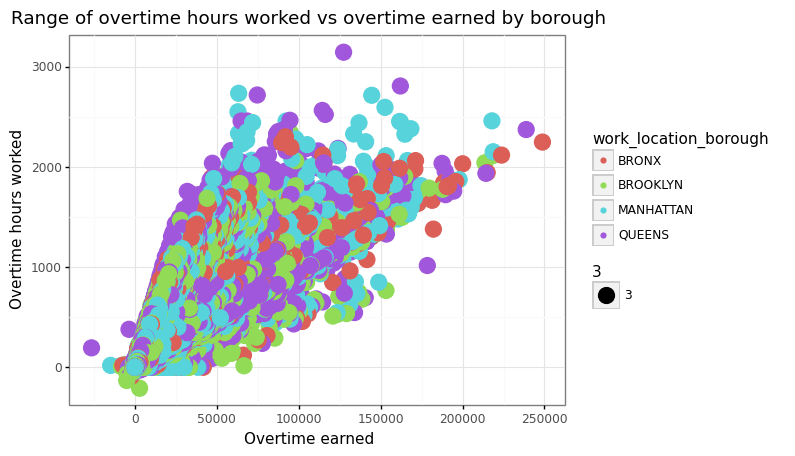

<ggplot: (774982527)>

In [25]:
(
    ggplot(df,
        aes('total_ot_paid', 'ot_hours'))
        + geom_point(aes(color='work_location_borough', size=3))
        + theme(figure_size=(12, 6))
        + theme_bw()
        + labs(
            title = "Range of overtime hours worked vs overtime earned by borough",
            y = "Overtime hours worked",
            x = "Overtime earned"
        )
)

# Let's zoom into those who made over $200K in overtime

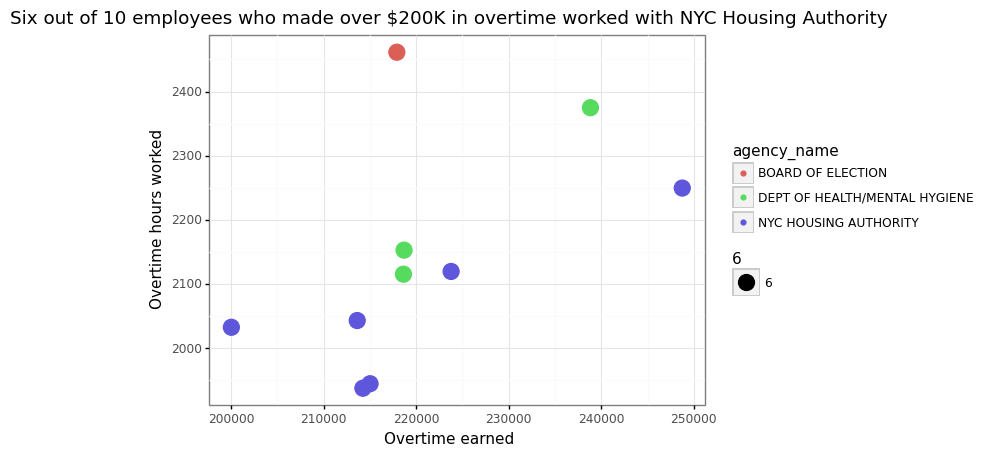

<ggplot: (774982056)>

In [26]:
(
    ggplot(df.sort_values(by='total_ot_paid', ascending = False).head(10),
        aes('total_ot_paid', 'ot_hours'))
        + geom_point(aes(color='agency_name', size=6))
        + theme(figure_size=(8, 5))
        + theme_bw()
        + labs(
            title = "Six out of 10 employees who made over $200K in overtime worked with NYC Housing Authority",
            y = "Overtime hours worked",
            x = "Overtime earned"
        )
)

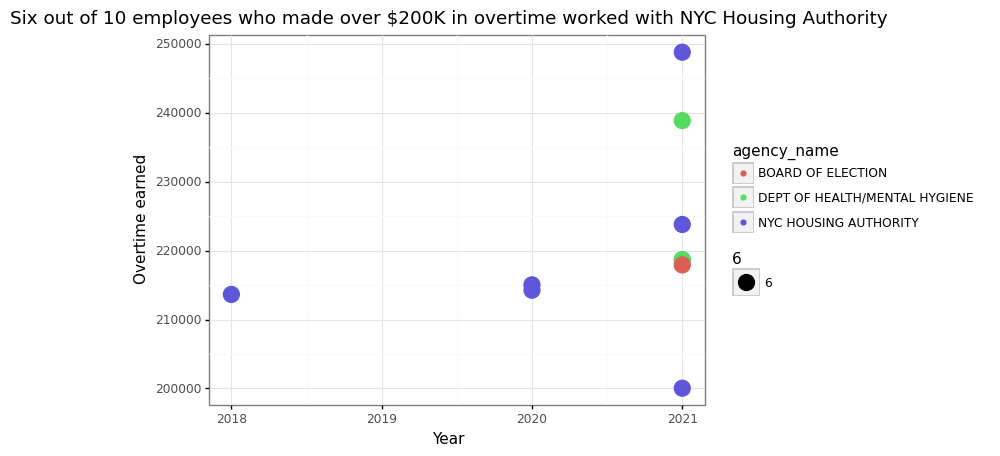

<ggplot: (829188090)>

In [27]:
(
    ggplot(df.query('total_ot_paid > 200000'),
        aes('fiscal_year', 'total_ot_paid'))
        + geom_point(aes(color='agency_name', size=6))
        + theme(figure_size=(8, 5))
        + theme_bw()
        + labs(
            title = "Six out of 10 employees who made over $200K in overtime worked with NYC Housing Authority",
            y = "Overtime earned",
            x = "Year"
        )
)

### I'm also interested in seeing how people's regular hours compare with their overtime hours.

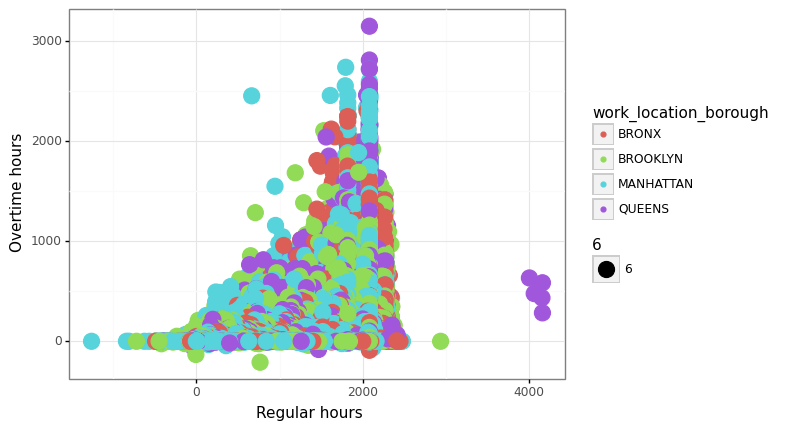

<ggplot: (380385971)>

In [28]:
(
    ggplot(df,
        aes('regular_hours', 'ot_hours'))
        + geom_point(aes(color='work_location_borough', size=6))
        + theme(figure_size=(8, 5))
        + theme_bw()
        + labs(
#             title = "Six out of 10 employees who made over $200K in overtime worked with NYC Housing Authority",
            y = "Overtime hours",
            x = "Regular hours"
        )
)

In [29]:
df.query('regular_hours > 3000')

fiscal_year  payroll_number               agency_name last_name  \
97605           2017             NaN  DEPARTMENT OF CORRECTION   JOHNSON   
616041          2018           72.00  DEPARTMENT OF CORRECTION   JOHNSON   
1162292         2019           72.00  DEPARTMENT OF CORRECTION   JOHNSON   
1811475         2020           72.00  DEPARTMENT OF CORRECTION   JOHNSON   
2292184         2021           72.00  DEPARTMENT OF CORRECTION   JOHNSON   

        first_name mid_init agency_start_date work_location_borough  \
97605        DAVID      NaN        05/26/2011                QUEENS   
616041       DAVID      NaN        05/26/2011                QUEENS   
1162292      DAVID      NaN        05/26/2011                QUEENS   
1811475      DAVID      NaN        05/26/2011                QUEENS   
2292184      DAVID      NaN        05/26/2011                QUEENS   

          title_description leave_status_as_of_june_30  base_salary  \
97605    CORRECTION OFFICER                     ACTIVE    82,808.00   
616041   CORRECTION OFFICER                     ACTIVE    85,292.00   
1162292  CORRECTION OFFICER                     ACTIVE    85,292.00   
1811475  CORRECTION OFFICER                     ACTIVE    85,292.00   
2292184  CORRECTION OFFICER                     ACTIVE    92,073.00   

         pay_basis  regular_hours  regular_gross_paid  ot_hours  \
97605    per Annum       4,003.43          141,953.44    632.50   
616041   per Annum       4,060.92          165,479.60    476.50   
1162292  per Annum       4,154.40          178,494.76    434.00   
1811475  per Annum       4,160.00          169,314.96    584.50   
2292184  per Annum       4,160.00          181,564.57    284.00   

         total_ot_paid  total_other_pay  total_pay  
97605        39,454.30        21,003.88 202,411.62  
616041       34,085.39        24,040.34 223,605.33  
1162292      30,841.24        26,132.35 235,468.35  
1811475      20,853.77        30,833.61 221,002.34  
2292184      11,687.42        27,117.90 220,369.89

In [30]:
df.query('ot_hours > 2000')

fiscal_year  payroll_number                    agency_name  \
6752            2017             NaN      ADMIN FOR CHILDREN'S SVCS   
6988            2017             NaN      ADMIN FOR CHILDREN'S SVCS   
88859           2017             NaN        DEPARTMENT OF BUILDINGS   
93910           2017             NaN       DEPARTMENT OF CORRECTION   
97803           2017             NaN       DEPARTMENT OF CORRECTION   
...              ...             ...                            ...   
2376669         2021          816.00  DEPT OF HEALTH/MENTAL HYGIENE   
2382831         2021          816.00  DEPT OF HEALTH/MENTAL HYGIENE   
2387130         2021          816.00  DEPT OF HEALTH/MENTAL HYGIENE   
2401091         2021          816.00  DEPT OF HEALTH/MENTAL HYGIENE   
2406813         2021          816.00  DEPT OF HEALTH/MENTAL HYGIENE   

           last_name first_name mid_init agency_start_date  \
6752           UDDIN    MOHAMED        F        10/27/2003   
6988         WATKINS     TYRONE        M        11/05/2001   
88859     CHERENFANT     DANIEL        F        12/07/2008   
93910       CORCORAN     DERMOT      NaN        03/22/1993   
97803          JONES      TANYA      NaN        07/05/1990   
...              ...        ...      ...               ...   
2376669     MARTINEZ   LEONARDO      NaN        07/06/2009   
2382831         DIAZ   HIPOLITO      NaN        07/06/2009   
2387130        LINTA    FELICIA      NaN        10/16/2006   
2401091  PUJOLS-BAEZ       ROSA        D        07/06/2009   
2406813    HERNANDEZ    MARITZA      NaN        07/06/2009   

        work_location_borough        title_description  \
6752                MANHATTAN   MOTOR VEHICLE OPERATOR   
6988                MANHATTAN                CUSTODIAN   
88859               MANHATTAN      COMMUNITY ASSOCIATE   
93910                  QUEENS  SUPERVISOR OF MECHANICS   
97803                  QUEENS                  CAPTAIN   
...                       ...                      ...   
2376669             MANHATTAN       INSTITUTIONAL AIDE   
2382831             MANHATTAN       INSTITUTIONAL AIDE   
2387130             MANHATTAN       INSTITUTIONAL AIDE   
2401091             MANHATTAN       INSTITUTIONAL AIDE   
2406813             MANHATTAN       INSTITUTIONAL AIDE   

        leave_status_as_of_june_30  base_salary  pay_basis  regular_hours  \
6752                        ACTIVE    46,476.00  per Annum       2,085.72   
6988                        ACTIVE    36,071.00  per Annum       2,085.72   
88859                       ACTIVE    45,156.00  per Annum       1,795.00   
93910                       ACTIVE       476.40    per Day       2,085.72   
97803                       ACTIVE   103,585.00  per Annum       2,085.72   
...                            ...          ...        ...            ...   
2376669                     ACTIVE    39,804.00  per Annum       2,080.00   
2382831                     ACTIVE    39,804.00  per Annum       2,080.00   
2387130                     ACTIVE    39,804.00  per Annum       2,080.00   
2401091                     ACTIVE    39,804.00  per Annum       2,080.00   
2406813                     ACTIVE    39,804.00  per Annum       2,080.00   

         regular_gross_paid  ot_hours  total_ot_paid  total_other_pay  \
6752              47,816.99  2,459.75      92,255.31         6,848.40   
6988              36,524.32  2,420.00      66,307.25         3,520.25   
88859             45,598.06  2,736.67      63,325.21           164.65   
93910            127,349.33  2,036.50     187,466.90         9,311.06   
97803             98,143.82  2,003.50     153,723.23        15,604.42   
...                     ...       ...            ...              ...   
2376669           39,692.00  2,351.75      68,445.02         3,927.33   
2382831           39,692.00  2,292.50      66,530.85         3,927.33   
2387130           39,692.00  2,230.75      64,866.69         3,817.71   
2401091           39,692.00  2,106.00      61,010.09       

In [31]:
df['hrs_diff'] = df.ot_hours - df.regular_hours

In [32]:
df.query('regular_hours > 0').sort_values(by='hrs_diff', ascending = False).query('hrs_diff > 1').query('leave_status_as_of_june_30 == "CEASED"')

fiscal_year  payroll_number                    agency_name  \
1705627         2020           56.00              POLICE DEPARTMENT   
1558323         2019          810.00        DEPARTMENT OF BUILDINGS   
2319996         2021           57.00                FIRE DEPARTMENT   
2293332         2021           57.00                FIRE DEPARTMENT   
2305260         2021           57.00                FIRE DEPARTMENT   
...              ...             ...                            ...   
2247278         2020          996.00          NYC HOUSING AUTHORITY   
1987492         2020          466.00  COMMUNITY COLLEGE (MANHATTAN)   
1783961         2020           57.00                FIRE DEPARTMENT   
525847          2017             NaN              POLICE DEPARTMENT   
1694668         2019           56.00              POLICE DEPARTMENT   

            last_name first_name mid_init agency_start_date  \
1705627        MURTHA      KEVIN      NaN        04/30/1995   
1558323    CHERENFANT     DANIEL        F        12/07/2008   
2319996    CAMPANELLI      JAMES        R        09/08/1991   
2293332      SENATORE     ROBERT        L        10/15/1995   
2305260       SIMMONS       JOHN        J        10/28/2001   
...               ...        ...      ...               ...   
2247278  WIELGOSINSKI      PAWEL      NaN        05/01/2017   
1987492         ULLOA      HARLO      NaN        03/18/2019   
1783961       WALTERS      WAYNE        J        05/05/2002   
525847   HUNTER-CLARK      TOBIA        M        07/18/1996   
1694668       ISAKSEN      DAVID        G        05/18/1992   

        work_location_borough                       title_description  \
1705627             MANHATTAN       LIEUTENANT D/A SPECIAL ASSIGNMENT   
1558323             MANHATTAN                     COMMUNITY ASSOCIATE   
2319996              BROOKLYN                                   PILOT   
2293332              BROOKLYN                                   PILOT   
2305260              BROOKLYN                            FIRE MARSHAL   
...                       ...                                     ...   
2247278             MANHATTAN                    ELECTRICIAN'S HELPER   
1987492             MANHATTAN                            STUDENT AIDE   
1783961              BROOKLYN                             FIREFIGHTER   
525847              MANHATTAN  SERGEANTD/A SUPERVISOR DETECTIVE SQUAD   
1694668             MANHATTAN     POLICE OFFICER D/A DETECTIVE 1ST GR   

        leave_status_as_of_june_30  base_salary  pay_basis  regular_hours  \
1705627                     CEASED   141,196.00  per Annum         665.18   
1558323                     CEASED    47,095.00  per Annum         945.00   
2319996                     CEASED   105,926.00  per Annum         708.60   
2293332                     CEASED   105,926.00  per Annum       1,531.43   
2305260                     CEASED    95,527.00  per Annum       1,188.60   
...                            ...          ...        ...            ...   
2247278                     CEASED       260.05    per Day          35.00   
1987492                     CEASED        15.00   per Hour          15.00   
1783961                     CEASED    85,292.00  per Annum          22.87   
525847                      CEASED   118,902.00  per Annum         102.87   
1694668                     CEASED   121,875.00  per Annum         102.88   

         regular_gross_paid  ot_hours  total_ot_paid  total_other_pay  \
1705627           48,008.86  2,451.57     162,000.47        78,132.88   
1558323           30,016.98  1,548.25      38,217.55           372.26   
2319996           35,979.05  1,285.00      67,990.37        36,284.10   
2293332           77,768.12  2,103.37     115,226.89        15,221.53   
2305260           54,431.18  1,683.00      76,079.23        29,798.06   
...                     ...       ...            ...              ...   
2247278            1,301.55     36.50       2,033.99           864.90   
1987492      

In [33]:
df.fiscal_year.value_counts()

2019    571230
2020    568895
2021    552822
2017    541957
2018    525778
Name: fiscal_year, dtype: int64